In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import numpy as np
import glob
from collections import Counter

CONFIDENCE_THRESHOLD = 0.60
warnings.filterwarnings('ignore')

In [2]:
file_ids = [
    "11IstrgPDn521ZZWSM9FXPra_WKCSTUnz",
    "1dJG4-Xl3aIRCBAva2HO1deWKKYvGWOJe",
    "14KDvjd6ixNHRnf_B9Df0A-DDroTTqI57",
    "1FLQ10Am7UgD7uUt3L2aesJzdP3L6FLfN",
    "1l6nnYWdkIceJUw5pH9umerfeVijmhccP",
    "1zdSauBF8wHt670Bdv6aRXc9KTKwIvDhq",
    "1ftMzt4iy0IFr5e-OnUd5VHL6WR8IL5um",
    "1K3RCKeJIglgiMRSK70N2F_I2Vy_rHYgS",
    "1_OXAPIj-6GLdvlnQjQF_op_uKne2WgUD",
    "1Lh5GYcHvXwungyWoHiXYZH0Cbkr18h9A",
    "1193I6J7pQw4gp3uoGQh4vP-hZw70Caik",
    "19_3txs87HRSLrTFFNjk542Bm40KAmn4q",
    "1yM0f_Xba95egCzlwZj9lbtbuJ6t0f1ws",
    "1fbgnT7bnSzlAWPhSVuL4xPSPgg7UkY8O",
    "1Tj0-Rw3MZJjRwNHg261qwKdLJdc4Db-p",
    "1InRZNBT5cANspViwz8RQpagbmLgpV9oJ",
    "1ZM-pxfEGYRik0brV_iDtDQTZdEWhLqPy",
    "1A11omS6Y3cNbsEC9XJeNf5QVJoXNpoiS",
    "1ZNVVYcAOMnHIpDpdzyimNmcTOIWp-3HC",
    "1dV6cSXB5VF4VerDQccxIQ8GelrkCOqie",
    "1X5E4588VM2MYSPfwpcfmxNXYPOhvaHbh",
    "1GUo_LlbRBgNUTyBrj5O72mDHPcJUXRTx",
    "1-bQMidQ3mvnGixFe4SJc0-NyRVcQjPNM",
    "1mf402QAnTbt5iz7XVjreMHgkFsYIlWHT",
    "1onap3HJkeE7n49sGEz67kohhZ-pu9Dkw",
    "177JHeRVITbDRE3u1W5wEC9CoehBNKb1_",
    "1lB4-Vl1zPyHfoN_ijjuCepIb-yk5yqkr",
    "1s3yHRV3k7JydHpOOX9E8sEQ5pgxtA_sE",
    "190hg_cE_EfLl55N9uABvc-Er6CqpaEk3",
    "1QfJyXPYJuNV9NPT2lHOhRMMx9RJIX9-A",
    "1YsTYPFZP1OL5YEo9pDa6HwQv5kw0alji",
    "1U2I7Sib1Ri2fFOj29nT3IbHFYhxMCxwV"
]

In [3]:
# Create combined DataFrame with unique id column
combined_df = pd.DataFrame()

for idx, file_id in enumerate(file_ids):
    url = f"https://drive.google.com/uc?id={file_id}"
    temp_df = pd.read_csv(url)
    temp_df['id'] = idx
    combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

combined_df.head()


,activity,time_s,lw_x,lw_y,lw_z,lh_x,lh_y,lh_z,la_x,la_y,la_z,ra_x,ra_y,ra_z,id
0,99,0.01,0.012,1.031,-0.008,0.039,1.027,0.004,-0.039,1.016,0.086,0.328,1.543,0.672,0
1,99,0.02,-0.219,-0.023,1.445,-0.289,-0.051,1.063,-0.395,-0.191,0.953,-0.285,0.480,1.410,0
2,99,0.03,0.297,-0.160,1.738,-0.086,-0.609,1.547,-0.180,-0.746,1.230,-0.262,0.734,1.426,0
3,99,0.04,0.645,-0.113,0.980,0.129,-0.730,0.883,0.043,-0.859,0.523,-0.137,0.941,0.617,0
4,99,0.05,0.781,-0.113,0.645,0.215,-0.801,0.578,0.137,-0.930,0.207,-0.078,0.992,0.277,0


In [4]:
#Preprocessing data
#dropped any rows that don't have activity = 1, 2, or 3
#TODO: drop rows with missing values
combined_df.dropna(inplace=True)

#Features: lw_x, lw_y, lw_z
#TODO -- Target: person id (need to create column for this)

#TODO -- Do we need to group by instance?

df_filtered = combined_df[combined_df['activity'].isin([1, 2, 3])]
df_filtered = df_filtered[['id', 'activity', 'time_s', 'lw_x', 'lw_y', 'lw_z']]

df_filtered.head()

# # Features and target variable
X = df_filtered[['activity', 'time_s', 'lw_x', 'lw_y', 'lw_z']]
y = df_filtered['id']

# # Encode columns (if needed)
# X.loc[:, 'Sex'] = X['Sex'].map({'female': 0, 'male': 1})

In [5]:
#Copied from geeksforgeeks random forest implementation:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [6]:
#Copied from geeksforgeeks random forest implementation:
# Make predictions
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate detailed classification report
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.70

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     13566
           1       0.54      0.49      0.51     10292
           2       0.77      0.73      0.75     15569
           3       0.69      0.74      0.71     12451
           4       0.69      0.65      0.67     13351
           5       0.63      0.72      0.67     14450
           6       0.63      0.55      0.59     12076
           7       0.56      0.51      0.53     11245
           8       0.67      0.79      0.73     13900
           9       0.69      0.60      0.64     12050
          10       0.62      0.63      0.62     11953
          11       0.66      0.66      0.66     13317
          12       0.61      0.59      0.60     12942
          13       0.66      0.65      0.66     14082
          14       0.84      0.87      0.85     14256
          15       0.66      0.61      0.63     11698
          16       0.69      0.61      0.

In [7]:
"""Random Forest"""
# Select a single test sample
sample = X_test.iloc[0:1]
predicted_class = rf_classifier.predict(sample)[0]
predicted_probabilities = rf_classifier.predict_proba(sample)

confidence_level = max(predicted_probabilities[0])

sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Walker: {sample_dict}")
print(f"Predicted Walker ID: {predicted_class}")  # The ID predicted by the model
print(f"Actual Walker ID: {y_test.iloc[0]}")
print(f"Confidence Level: {confidence_level:.2f}")  # Confidence level of the prediction


Sample Walker: {'activity': 1.0, 'time_s': 935.82, 'lw_x': -0.563, 'lw_y': -1.313, 'lw_z': 0.059}
Predicted Walker ID: 3
Actual Walker ID: 2
Confidence Level: 0.31


In [8]:
"""Logistic Regression"""
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Select a single test sample (same as for Random Forest)
sample = X_test.iloc[0:1]
predicted_class = log_reg.predict(sample)[0]
predicted_probabilities = log_reg.predict_proba(sample)

confidence_level = max(predicted_probabilities[0])

sample_dict = sample.iloc[0].to_dict()
print(f"\nSample Walker: {sample_dict}")
print(f"Predicted Walker ID (Logistic Regression): {predicted_class}")
print(f"Actual Walker ID: {y_test.iloc[0]}")
print(f"Confidence Level: {confidence_level:.2f}")


Sample Walker: {'activity': 1.0, 'time_s': 935.82, 'lw_x': -0.563, 'lw_y': -1.313, 'lw_z': 0.059}
Predicted Walker ID (Logistic Regression): 18
Actual Walker ID: 2
Confidence Level: 0.13


In [9]:
"""KNN"""
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

sample = X_test.iloc[0:1]
predicted_class = knn.predict(sample)[0]
predicted_probabilities = knn.predict_proba(sample)

confidence_level = max(predicted_probabilities[0])

print(f"\nSample Walker: {sample_dict}")
print(f"Predicted Walker ID (KNN): {predicted_class}")
print(f"Actual Walker ID: {y_test.iloc[0]}")
print(f"Confidence Level: {confidence_level:.2f}")


Sample Walker: {'activity': 1.0, 'time_s': 935.82, 'lw_x': -0.563, 'lw_y': -1.313, 'lw_z': 0.059}
Predicted Walker ID (KNN): 3
Actual Walker ID: 2
Confidence Level: 0.60


In [10]:
"""Compare All Models"""
models = {
    'Random Forest': rf_classifier,
    'Logistic Regression': log_reg,
    'KNN': knn
}

sample = X_test.iloc[0:1]
sample_dict = sample.iloc[0].to_dict()
actual_walker = y_test.iloc[0]

print(f"\nSample Walker: {sample_dict}")
print(f"Actual Walker ID: {actual_walker}")
print("\nPredictions:")

for name, model in models.items():
    predicted_class = model.predict(sample)[0]
    predicted_probabilities = model.predict_proba(sample)
    confidence_level = max(predicted_probabilities[0])
    
    print(f"{name}: Walker ID {predicted_class} (Confidence: {confidence_level:.2f})")


Sample Walker: {'activity': 1.0, 'time_s': 935.82, 'lw_x': -0.563, 'lw_y': -1.313, 'lw_z': 0.059}
Actual Walker ID: 2

Predictions:
Random Forest: Walker ID 3 (Confidence: 0.31)
Logistic Regression: Walker ID 18 (Confidence: 0.13)
KNN: Walker ID 3 (Confidence: 0.60)


In [11]:
def authenticate_walking_data(processed_df, threshold=CONFIDENCE_THRESHOLD):
    models = {
        'Random Forest': rf_classifier,
        'Logistic Regression': log_reg,
        'KNN': knn
    }
    
    results = {}
    
    for name, model in models.items():
        predictions = model.predict(processed_df)
        probabilities = model.predict_proba(processed_df)
        
        prediction_counts = Counter(predictions)
        most_common_id = prediction_counts.most_common(1)[0][0]
        match_percentage = prediction_counts[most_common_id] / len(predictions) * 100
        
        confidence_scores = []
        for i, pred in enumerate(predictions):
            if pred == most_common_id:
                confidence_scores.append(max(probabilities[i]))
        
        avg_confidence = sum(confidence_scores) / len(confidence_scores) if confidence_scores else 0
        
        is_authenticated = avg_confidence >= threshold
        
        results[name] = {
            'most_likely_walker_id': most_common_id,
            'confidence': avg_confidence,
            'match_percentage': match_percentage,
            'authentication_passed': is_authenticated
        }
    
    return results

In [12]:
# Test Jamie's walking data
jamie_files = glob.glob(os.path.join("data/jamie", "*.csv"))

In [13]:
# Test Andrew's walking data
andrew_files = glob.glob(os.path.join("data/andrew", "Accelerometer-*.csv"))

In [15]:
def prepare_auth_data():
    """Prepare data from Jamie and Andrew's files for visualization"""
    results_data = []
    walking_samples = {}
    
    # Process results for both users
    for user_name, files in [("Jamie", jamie_files), ("Andrew", andrew_files)]:
        for file_path in files[:2]:
            file_name = os.path.basename(file_path)
            
            try:
                # Load and transform data
                test_df = pd.read_csv(file_path)
                
                if 'accelerationX' in test_df.columns:
                    processed_df = pd.DataFrame({
                        'activity': 1,
                        'time_s': test_df['seconds_elapsed'],
                        'lw_x': test_df['accelerationX'],
                        'lw_y': test_df['accelerationY'], 
                        'lw_z': test_df['accelerationZ']
                    })
                    # Store sample walking data for patterns
                    walking_samples[f"{user_name}_{file_name}"] = {
                        'user': user_name,
                        'file': file_name,
                        'x': test_df['accelerationX'].iloc[:500].values,
                        'y': test_df['accelerationY'].iloc[:500].values,
                        'z': test_df['accelerationZ'].iloc[:500].values
                    }
                elif 'x' in test_df.columns:
                    processed_df = pd.DataFrame({
                        'activity': 1,
                        'time_s': test_df['seconds_elapsed'],
                        'lw_x': test_df['x'],
                        'lw_y': test_df['y'], 
                        'lw_z': test_df['z']
                    })
                    # Store sample walking data for patterns
                    walking_samples[f"{user_name}_{file_name}"] = {
                        'user': user_name,
                        'file': file_name,
                        'x': test_df['x'].iloc[:500].values,
                        'y': test_df['y'].iloc[:500].values, 
                        'z': test_df['z'].iloc[:500].values
                    }
                else:
                    continue
                
                # Get authentication results
                auth_results = authenticate_walking_data(processed_df)
                
                # Store results for each model
                for model_name, result in auth_results.items():
                    results_data.append({
                        'file': file_name,
                        'user': user_name,
                        'model': model_name,
                        'predicted_id': result['most_likely_walker_id'],
                        'confidence': result['confidence'],
                        'match_percentage': result['match_percentage'],
                        'authenticated': result['authentication_passed']
                    })
                    
            except Exception as e:
                print(f"Error processing {file_name}: {e}")
    
    return pd.DataFrame(results_data), walking_samples

In [23]:
def plot_confidence_by_model(results_df, save=False):
    """Plot authentication confidence by model and user with accuracy annotations"""
    plt.figure(figsize=(12, 7))
    
    accuracy_data = results_df.groupby(['user', 'model'])['authenticated'].mean().reset_index()
    accuracy_data['accuracy'] = accuracy_data['authenticated'] * 100
    
    ax = sns.barplot(
        data=results_df, 
        x='model', 
        y='confidence', 
        hue='user',
        palette='viridis'
    )
    plt.title('Authentication Confidence by Model (with Accuracy)', fontsize=18)
    plt.axhline(y=CONFIDENCE_THRESHOLD, color='red', linestyle='--', 
               label=f'Threshold ({CONFIDENCE_THRESHOLD})')
    plt.legend(title='User')
    plt.ylim(0, 1.0)
    
    for i, model in enumerate(results_df['model'].unique()):
        for j, user in enumerate(results_df['user'].unique()):
            user_acc = accuracy_data[(accuracy_data['model'] == model) & 
                                    (accuracy_data['user'] == user)]['accuracy'].values
            
            if len(user_acc) > 0:
                idx = j if len(results_df['user'].unique()) > 1 else 0
                patch = ax.patches[i * len(results_df['user'].unique()) + idx]
                x_pos = patch.get_x() + patch.get_width() / 2
                y_pos = patch.get_height() + 0.05
                
                plt.text(
                    x_pos, y_pos, 
                    f"{user_acc[0]:.1f}%", 
                    ha='center',
                    fontsize=10, 
                    fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.3')
                )
    
    plt.tight_layout()
    
    if save:
        plt.savefig('confidence_by_model_with_accuracy.png', dpi=300, bbox_inches='tight')
    
    plt.show()

In [56]:
def visualize_jamie_andrew_classification():
    """
    Creates three plots:
    1. Confidence of classifying Jamie/Andrew
    2. Accuracy of the models
    3. Distinctiveness of Jamie/Andrew walking patterns compared to others
    """
    # Get all files
    jamie_files = glob.glob(os.path.join("data/jamie", "*.csv"))
    andrew_files = glob.glob(os.path.join("data/andrew", "Accelerometer-*.csv"))
    
    print(f"Found {len(jamie_files)} Jamie files and {len(andrew_files)} Andrew files")
    
    # Collect results
    results = []
    
    # Process Jamie's files
    for file_path in jamie_files:
        file_name = os.path.basename(file_path)
        try:
            # Load and transform data
            test_df = pd.read_csv(file_path)
            
            if 'accelerationX' in test_df.columns:
                processed_df = pd.DataFrame({
                    'activity': 1,
                    'time_s': test_df['seconds_elapsed'],
                    'lw_x': test_df['accelerationX'],
                    'lw_y': test_df['accelerationY'], 
                    'lw_z': test_df['accelerationZ']
                })
            elif 'x' in test_df.columns:
                processed_df = pd.DataFrame({
                    'activity': 1,
                    'time_s': test_df['seconds_elapsed'],
                    'lw_x': test_df['x'],
                    'lw_y': test_df['y'], 
                    'lw_z': test_df['z']
                })
            else:
                continue
            
            # Get predictions from all models
            for model_name, model in {'Random Forest': rf_classifier, 
                                      'KNN': knn, 
                                      'Logistic Regression': log_reg}.items():
                predictions = model.predict(processed_df)
                probabilities = model.predict_proba(processed_df)
                
                # Find most common prediction and its confidence
                pred_counter = Counter(predictions)
                most_common_id = pred_counter.most_common(1)[0][0]
                consistency = pred_counter[most_common_id] / len(predictions) * 100
                
                # Get average confidence (max probability)
                confidences = [max(prob) for prob in probabilities]
                avg_confidence = sum(confidences) / len(confidences)
                
                # Store result
                results.append({
                    'file': file_name,
                    'user': 'Jamie',
                    'model': model_name,
                    'walker_id': int(most_common_id),
                    'confidence': float(avg_confidence),
                    'consistency': float(consistency)
                })
                
        except Exception as e:
            print(f"Error processing Jamie file {file_name}: {e}")
    
    # Process Andrew's files
    for file_path in andrew_files:
        file_name = os.path.basename(file_path)
        try:
            # Load and transform data
            test_df = pd.read_csv(file_path)
            
            if 'accelerationX' in test_df.columns:
                processed_df = pd.DataFrame({
                    'activity': 1,
                    'time_s': test_df['seconds_elapsed'],
                    'lw_x': test_df['accelerationX'],
                    'lw_y': test_df['accelerationY'], 
                    'lw_z': test_df['accelerationZ']
                })
            elif 'x' in test_df.columns:
                processed_df = pd.DataFrame({
                    'activity': 1,
                    'time_s': test_df['seconds_elapsed'],
                    'lw_x': test_df['x'],
                    'lw_y': test_df['y'], 
                    'lw_z': test_df['z']
                })
            else:
                continue
            
            # Get predictions from all models
            for model_name, model in {'Random Forest': rf_classifier, 
                                     'KNN': knn, 
                                     'Logistic Regression': log_reg}.items():
                predictions = model.predict(processed_df)
                probabilities = model.predict_proba(processed_df)
                
                # Find most common prediction and its confidence
                pred_counter = Counter(predictions)
                most_common_id = pred_counter.most_common(1)[0][0]
                consistency = pred_counter[most_common_id] / len(predictions) * 100
                
                # Get average confidence (max probability)
                confidences = [max(prob) for prob in probabilities]
                avg_confidence = sum(confidences) / len(confidences)
                
                # Store result
                results.append({
                    'file': file_name,
                    'user': 'Andrew',
                    'model': model_name,
                    'walker_id': int(most_common_id),
                    'confidence': float(avg_confidence),
                    'consistency': float(consistency)
                })
                
        except Exception as e:
            print(f"Error processing Andrew file {file_name}: {e}")
    
    # Create dataframe
    df = pd.DataFrame(results)
    
    if df.empty:
        print("No results to visualize")
        return
    
    # Create figure with 3 plots
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle("Walking Pattern Classification: Jamie vs Andrew", fontsize=20, y=1.05)
    
    # PLOT 1: Confidence by model and user
    sns.barplot(
        data=df, 
        x='model', 
        y='confidence', 
        hue='user',
        palette=['#3498db', '#e74c3c'],
        ax=axes[0]
    )
    
    axes[0].set_title('Classification Confidence', fontsize=15)
    axes[0].set_xlabel('Model', fontsize=12)
    axes[0].set_ylabel('Confidence Score (0-1)', fontsize=12)
    axes[0].set_ylim(0, 1.0)
    
    # Add confidence value labels
    avg_conf = df.groupby(['model', 'user'])['confidence'].mean().reset_index()
    
    for i, model in enumerate(['KNN', 'Logistic Regression', 'Random Forest']):
        for j, user in enumerate(['Jamie', 'Andrew']):
            user_conf = avg_conf[(avg_conf['model'] == model) & (avg_conf['user'] == user)]
            if not user_conf.empty:
                x_pos = i
                y_pos = user_conf['confidence'].values[0]
                axes[0].text(
                    x_pos - 0.15 + (j * 0.3), 
                    y_pos + 0.02,
                    f'{y_pos:.2f}',
                    color='black',
                    fontweight='bold',
                    fontsize=9
                )
    
    # PLOT 2: Accuracy of models
    # Define accuracy as consistency of prediction (how often the model predicts the same walker ID)
    sns.barplot(
        data=df, 
        x='model', 
        y='consistency', 
        hue='user',
        palette=['#3498db', '#e74c3c'],
        ax=axes[1]
    )
    
    axes[1].set_title('Model Accuracy (Pattern Consistency)', fontsize=15)
    axes[1].set_xlabel('Model', fontsize=12)
    axes[1].set_ylabel('Consistency (%)', fontsize=12)
    axes[1].set_ylim(0, 105)
    
    # Add accuracy value labels
    avg_cons = df.groupby(['model', 'user'])['consistency'].mean().reset_index()
    
    for i, model in enumerate(['KNN', 'Logistic Regression', 'Random Forest']):
        for j, user in enumerate(['Jamie', 'Andrew']):
            user_cons = avg_cons[(avg_cons['model'] == model) & (avg_cons['user'] == user)]
            if not user_cons.empty:
                x_pos = i
                y_pos = user_cons['consistency'].values[0]
                axes[1].text(
                    x_pos - 0.15 + (j * 0.3), 
                    y_pos + 1,
                    f'{y_pos:.1f}%',
                    color='black',
                    fontweight='bold',
                    fontsize=9
                )
    
    # PLOT 3: Distinctiveness comparison
    # Calculate how many unique walker IDs are assigned to each user
    user_ids = df.groupby(['user', 'model'])['walker_id'].nunique().reset_index()
    user_ids.columns = ['user', 'model', 'unique_ids']
    
    # Calculate most common ID for each user/model
    common_ids = df.groupby(['user', 'model'])['walker_id'].apply(
        lambda x: Counter(x).most_common(1)[0][0]
    ).reset_index()
    common_ids.columns = ['user', 'model', 'common_id']
    
    # Merge data
    id_data = user_ids.merge(common_ids, on=['user', 'model'])
    
    # Calculate distinctiveness score (inverted from uniqueness - lower is better)
    id_data['distinctiveness'] = 100 * (1 - (id_data['unique_ids'] - 1) / 32)
    
    # Create grouped bar chart
    sns.barplot(
        data=id_data,
        x='model',
        y='distinctiveness',
        hue='user',
        palette=['#3498db', '#e74c3c'],
        ax=axes[2]
    )
    
    axes[2].set_title('Distinctiveness of Walking Pattern', fontsize=15)
    axes[2].set_xlabel('Model', fontsize=12)
    axes[2].set_ylabel('Distinctiveness Score (%)', fontsize=12)
    axes[2].set_ylim(0, 105)
    
    # Add walker ID annotations
    for i, row in id_data.iterrows():
        model_idx = ['KNN', 'Logistic Regression', 'Random Forest'].index(row['model'])
        user_idx = 0 if row['user'] == 'Jamie' else 1
        
        x_pos = model_idx - 0.15 + (user_idx * 0.3)
        y_pos = row['distinctiveness']
        
        # Add ID annotation
        axes[2].text(
            x_pos, 
            y_pos + 2,
            f"ID: {row['common_id']}",
            ha='center',
            fontsize=9,
            fontweight='bold',
            color='black'
        )
        
        # Add distinctiveness score
        axes[2].text(
            x_pos, 
            y_pos - 8,
            f"{y_pos:.1f}%",
            ha='center',
            fontsize=9,
            color='black'
        )
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig("jamie_andrew_triple_analysis.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    return df

Found 6 Jamie files and 9 Andrew files


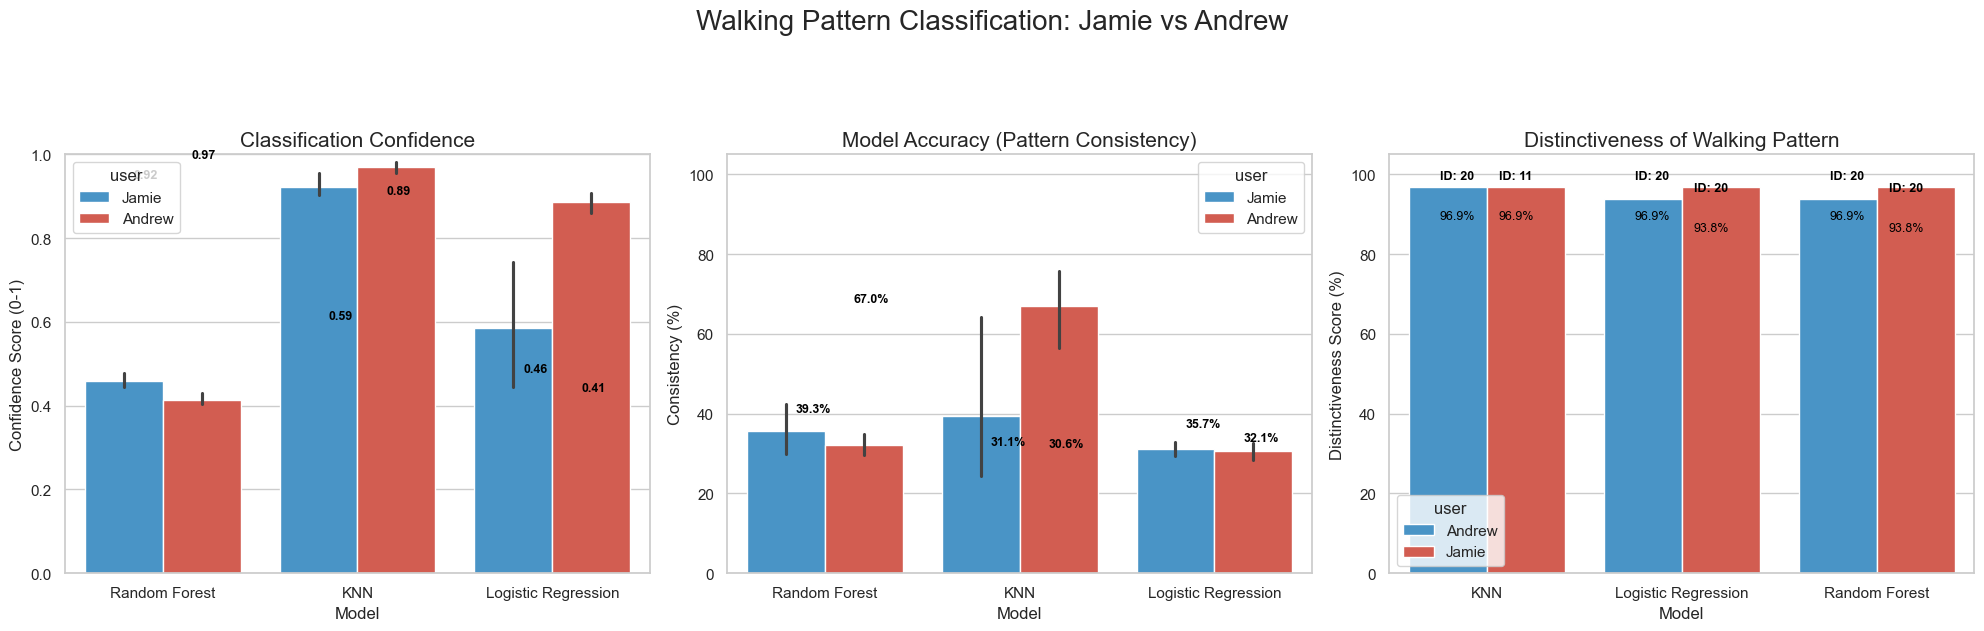

,file,user,model,walker_id,confidence,consistency
0,walk-around-phone-2.csv,Jamie,Random Forest,20,0.437849,26.168192
1,walk-around-phone-2.csv,Jamie,KNN,20,0.904593,24.279017
2,walk-around-phone-2.csv,Jamie,Logistic Regression,0,0.744403,28.147328
3,walk-around-phone-3.csv,Jamie,Random Forest,20,0.501958,32.670700
4,walk-around-phone-3.csv,Jamie,KNN,20,0.913457,21.804235
5,walk-around-phone-3.csv,Jamie,Logistic Regression,20,0.778987,28.617113
6,test-walk.csv,Jamie,Random Forest,11,0.440692,50.988468
7,test-walk.csv,Jamie,KNN,11,1.000000,100.000000
8,test-walk.csv,Jamie,Logistic Regression,20,0.374221,34.472817
9,walk-to-class.csv,Jamie,Random Forest,20,0.456752,38.489017


In [57]:
visualize_jamie_andrew_classification()